In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [2]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 9000

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

### Define beamline

In [5]:
# crystal asymmetry angle
alphaAsym = 7.7*np.pi/180

# distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
f1 = .88
# distance between CRLs and focus
f2 = 1.1

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=789.9, FOV=2e-3, N=256)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=[1,1,1], length=1e-2, width=20e-3, z=790, E0=E0,
                          alphaAsym=0, orientation=0, pol='p')

# second crystal: asymmetric reflection, orientation flipped relative to crystal1
crystal2 = optics.Crystal('c2', hkl=[1,1,1], length=1e-2, width=20e-3, z=790.1, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='p')
# printing crystal incidence and reflection angles for confirmation
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

# CRL with ~1 meter focal length (modeled as single element for now)
crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=8.43e-6, diameter=5e-3)

# viewing point downstream of first crl
im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

# viewing point at focus
focus = optics.PPM('focus', z=crl1.z+f2, FOV=100e-6, N=256)

# slit at focus
slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3, x_width=1e-6, y_width=2e-3)

# second CRL with ~1 meter focal length, for collimation
crl2 = optics.CRL('crl2', z=focus.z+f2, roc=8.43e-6, diameter=5e-3)

# third crystal, symmetric reflection, same orientation as crystal2
crystal3 = optics.Crystal('c3', hkl=[1,1,1], length=1e-2, width=10e-3, z=crl2.z+.15, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='p')

# fourth crystal, asymmetric reflection, same orientation as crystal1
crystal4 = optics.Crystal('c4', hkl=[1,1,1], length=1e-2, width=10e-3, z=crl2.z+f1, E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='p')

# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [im0,crystal1,crystal2,im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
x is focused
y is focused
b 1.00
b 4.00
crystal 2 incidence angle: 20.39 degrees
crystal 2 exit angle: 5.00 degrees
b 1.00
b 0.25
after c1: 0.44
after c2: -0.00
after c3: -0.44
after c4: -0.00


### Propagation through monochromator at central photon energy

FWHM in x: 551.8511645456897 microns
FWHM in y: 551.8511645456897 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131251107855566
5.131251107855566
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 159.999999
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110685
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.000690
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.880690
zy: 160.990686
azimuth -0.05 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103525
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003525
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003525
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003525
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003525
zy: 162.090686
azimuth -0.0

<IPython.core.display.Javascript object>


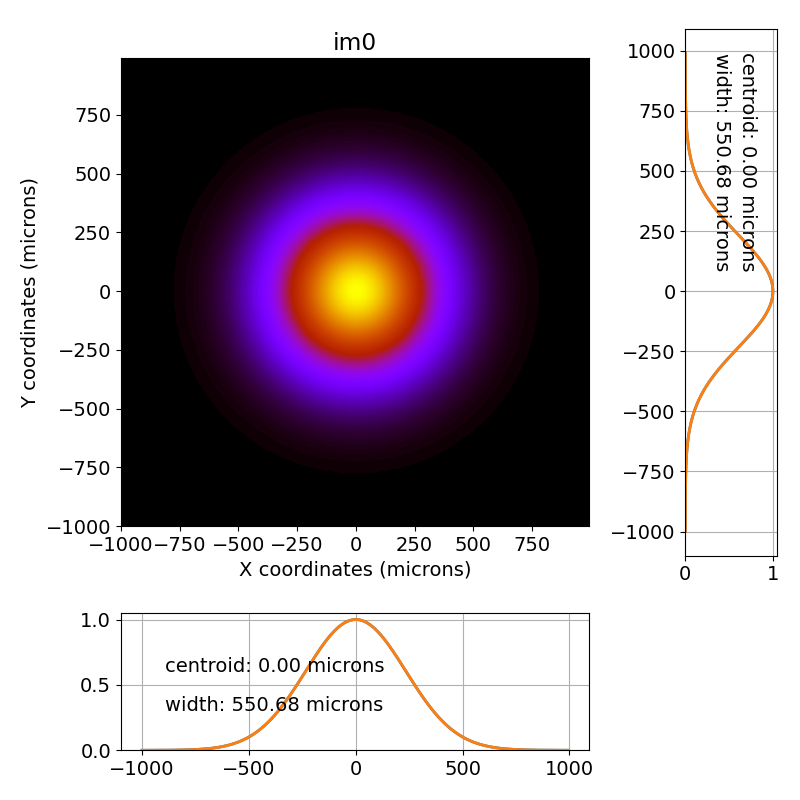

<IPython.core.display.Javascript object>


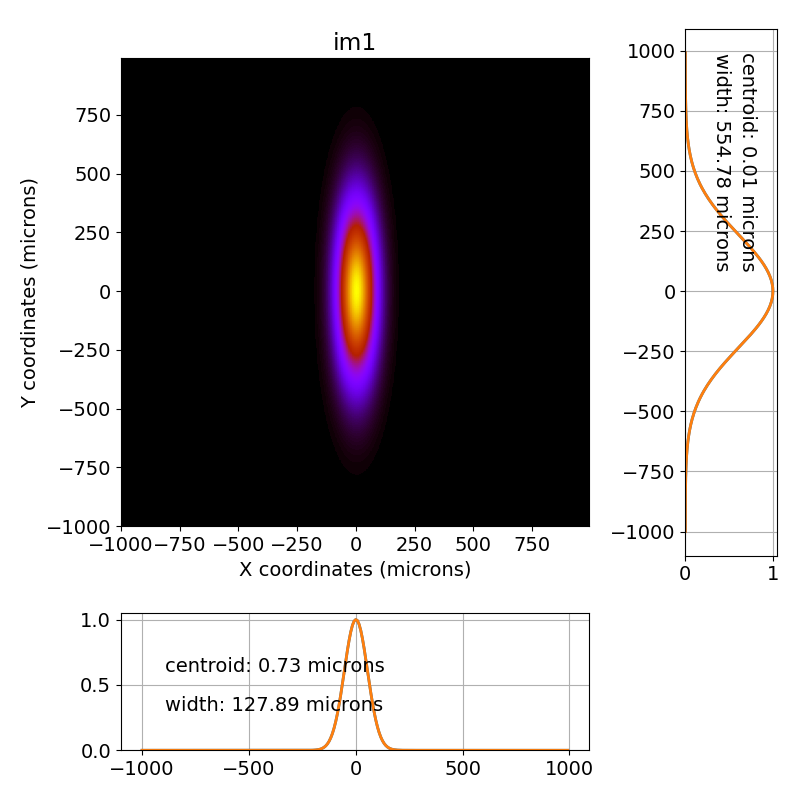

<IPython.core.display.Javascript object>


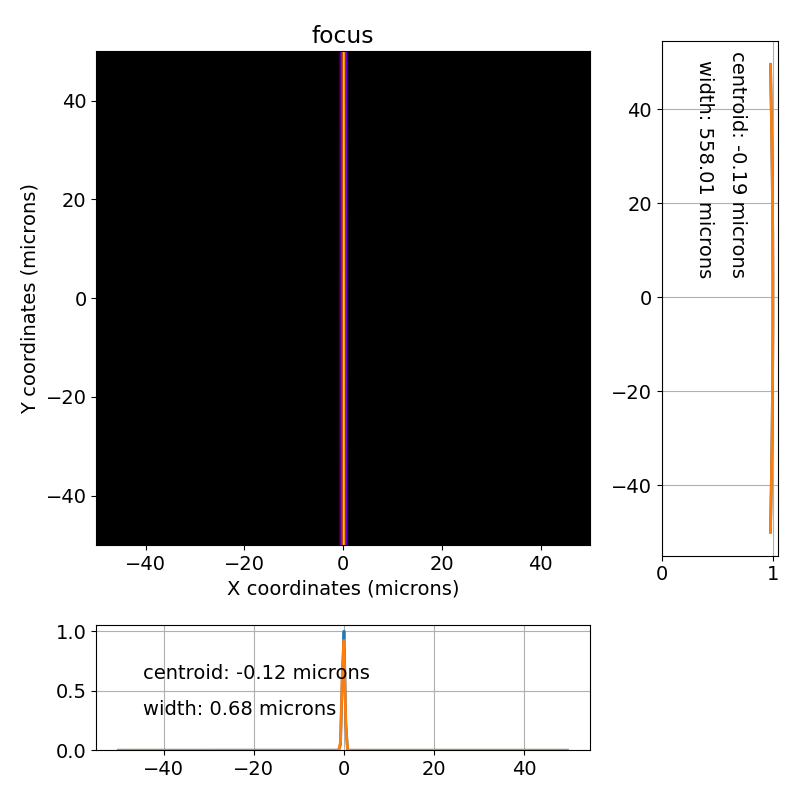

<IPython.core.display.Javascript object>


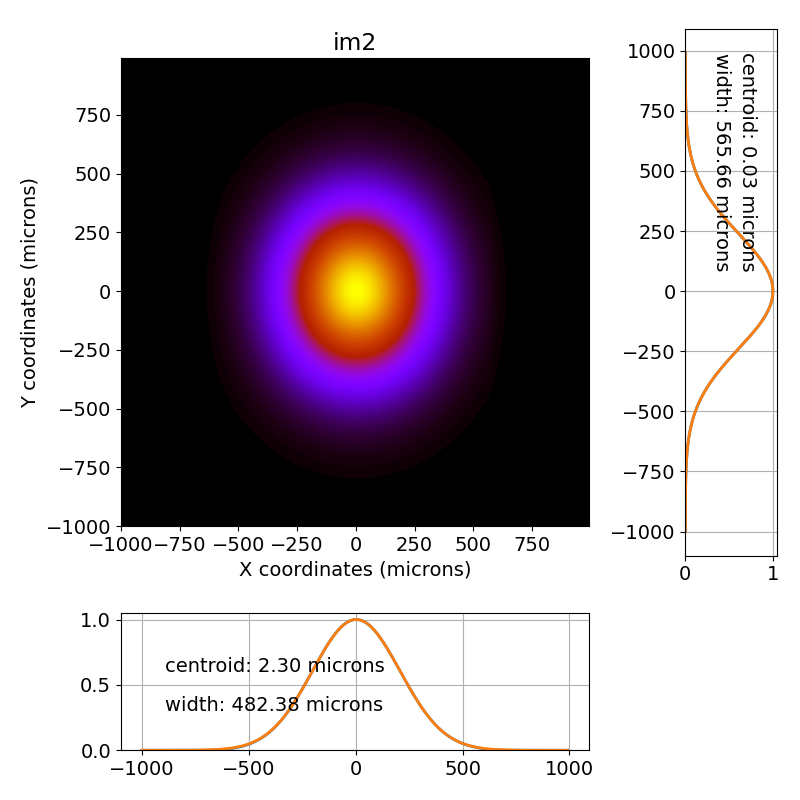

In [6]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations
mono_beamline.im0.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

## Time-domain propagation

In [25]:
# reset central photon energy
beam_params['photonEnergy'] = 9000

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=5, time_window=1000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 449


In [26]:
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130720898225868
5.130720898225868
x is focused
y is focused
FWHM in x: 551.9081342813263 microns
FWHM in y: 551.9081342813263 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130720898225868
5.130720898225868
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.984706
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.00
zx: 10.864706
zy: 160.990686
azimuth 0.02 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103454
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: -0.00
zx: -1.003454
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003454
zy: 161.090686
azimuth -0

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130723265233144
5.130723265233144
x is focused
y is focused
FWHM in x: 551.9078799259707 microns
FWHM in y: 551.9078799259707 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130723265233144
5.130723265233144
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.984777
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.864777
zy: 160.990686
azimuth 0.01 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103455
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003455
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003455
zy: 161.090686
azimuth -0.

zx: -170.360739
zy: 164.248704
azimuth -0.03 mrad
im2
zx: -170.360739
zy: 164.248704
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130737467276795
5.130737467276795
x is focused
y is focused
FWHM in x: 551.9063537987689 microns
FWHM in y: 551.9063537987689 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130737467276795
5.130737467276795
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.985205
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.865205
zy: 160.990686
azimuth 0.01 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103457
zy: 160.990686
azimuth -0.05 mrad
drift4
de

zx: -1.003459
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003459
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003459
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003459
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096541
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.585263
zy: 163.190686
azimuth -0.12 mrad
drift7
delta z: 1.38
zx: -11.435554
zy: 163.340396
azimuth -0.12 mrad
c3
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.435554
zy: 163.340396
azimuth -443.02 mrad
drift8
delta z: -0.53
zx: -10.627412
zy: 164.148537
azimuth -443.02 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.469774
zy: 164.148537
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.369606
zy: 164.248705
azimuth -0.03 mrad
im2
zx: -170.369606
zy: 164.248705
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.986062
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.866062
zy: 160.990686
azimuth 0.01 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103460
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003460
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003460
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003460
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003460
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096540
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.586171
zy: 163.190686
azimuth -0.12 mrad
drift7
delta z: 1.38
zx: -11.43

zx: 1.096538
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.587078
zy: 163.190686
azimuth -0.12 mrad
drift7
delta z: 1.38
zx: -11.437352
zy: 163.340412
azimuth -0.12 mrad
c3
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.437352
zy: 163.340412
azimuth -443.03 mrad
drift8
delta z: -0.53
zx: -10.629217
zy: 164.148547
azimuth -443.03 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.484972
zy: 164.148547
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.384813
zy: 164.248705
azimuth -0.03 mrad
im2
zx: -170.384813
zy: 164.248705
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130782440415029
5.130782440415029
x is focused
y is focused
FWHM in x: 551.9015211183957 microns
FWHM in y: 551.9015211183957 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130782440415029
5.130782440415029
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad


FWHM in x: 551.9005037228025 microns
FWHM in y: 551.9005037228025 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.13079190844413
5.13079190844413
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.986847
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.866847
zy: 160.990686
azimuth 0.01 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103464
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003464
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003464
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003464
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003464
zy: 162.090686
azimuth -0.05 mr

zx: -1.003466
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003466
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003466
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003466
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096534
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.588743
zy: 163.190686
azimuth -0.11 mrad
drift7
delta z: 1.38
zx: -11.439002
zy: 163.340427
azimuth -0.11 mrad
c3
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.439002
zy: 163.340427
azimuth -443.03 mrad
drift8
delta z: -0.53
zx: -10.630872
zy: 164.148556
azimuth -443.03 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.498911
zy: 164.148556
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.398762
zy: 164.248706
azimuth -0.03 mrad
im2
zx: -170.398762
zy: 164.248706
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.03158005400378

zx: -170.406373
zy: 164.248706
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130822679538712
5.130822679538712
x is focused
y is focused
FWHM in x: 551.8971972130691 microns
FWHM in y: 551.8971972130691 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130822679538712
5.130822679538712
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.987775
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.867775
zy: 160.990686
azimuth 0.00 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103468
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003468
zy: 161.090686
azimuth -0.05

zx: -11.440652
zy: 163.340442
azimuth -0.11 mrad
c3
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.440652
zy: 163.340442
azimuth -443.03 mrad
drift8
delta z: -0.53
zx: -10.632528
zy: 164.148566
azimuth -443.03 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.512859
zy: 164.148566
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.412718
zy: 164.248706
azimuth -0.03 mrad
im2
zx: -170.412718
zy: 164.248706
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130834514575088
5.130834514575088
x is focused
y is focused
FWHM in x: 551.8959254891221 microns
FWHM in y: 551.8959254891221 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130834514575088
5.130834514575088
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.0

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.988417
zy: 160.110686
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 10.868417
zy: 160.990686
azimuth -0.00 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103471
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003471
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003471
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003471
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003471
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096529
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.591165
zy: 163.190686
azimuth -0.11 mrad
drift7
delta z: 1.38
zx: -11.441402
zy: 163.340449
azimuth -0.11 mrad
c3
zRx: 3.3

zx: -11.442302
zy: 163.340457
azimuth -0.11 mrad
c3
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.442302
zy: 163.340457
azimuth -443.04 mrad
drift8
delta z: -0.53
zx: -10.634185
zy: 164.148575
azimuth -443.04 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.526815
zy: 164.148575
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.426682
zy: 164.248707
azimuth -0.03 mrad
im2
zx: -170.426682
zy: 164.248707
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130860551655119
5.130860551655119
x is focused
y is focused
FWHM in x: 551.8931277171004 microns
FWHM in y: 551.8931277171004 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130860551655119
5.130860551655119
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.0

zx: -11.443053
zy: 163.340464
azimuth -0.11 mrad
c3
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.443053
zy: 163.340464
azimuth -443.04 mrad
drift8
delta z: -0.53
zx: -10.634938
zy: 164.148579
azimuth -443.04 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.533160
zy: 164.148579
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.433032
zy: 164.248707
azimuth -0.03 mrad
im2
zx: -170.433032
zy: 164.248707
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130872386691497
5.130872386691497
x is focused
y is focused
FWHM in x: 551.8918560119367 microns
FWHM in y: 551.8918560119367 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130872386691497
5.130872386691497
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.0

zx: -0.003476
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096524
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.593588
zy: 163.190686
azimuth -0.10 mrad
drift7
delta z: 1.38
zx: -11.443803
zy: 163.340471
azimuth -0.10 mrad
c3
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.443803
zy: 163.340471
azimuth -443.04 mrad
drift8
delta z: -0.53
zx: -10.635691
zy: 164.148583
azimuth -443.04 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.539508
zy: 164.148583
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.439384
zy: 164.248707
azimuth -0.03 mrad
im2
zx: -170.439384
zy: 164.248707
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130884221727873
5.130884221727873
x is focused
y is focused
FWHM in x: 551.890584312643 microns
FWHM in y: 551.890584312643 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergen

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.989916
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.869916
zy: 160.990686
azimuth -0.01 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103478
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003478
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003478
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003478
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003478
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096522
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.594346
zy: 163.190686
azimuth -0.10 mrad
drift7
delta z: 1.38
zx: -11.444554
zy: 163.340478
azimuth -0.10 mrad
c3
zRx: 3.39e+00
zRy: 4.72e+01
zx: -11.444554
zy: 163.340478
azimuth -443.04 mrad
drift8
delta z: -0.53
zx: -1

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.990272
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.870272
zy: 160.990686
azimuth -0.01 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103479
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003479
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003479
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003479
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003479
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096521
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.595104
zy: 163.190686
azimuth -0.10 mrad
drift7
delta z: 1.38
zx: -11.445305
zy: 163.340485
azimuth -0.10 mrad
c3
zRx: 3.3

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.990629
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.870629
zy: 160.990686
azimuth -0.01 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103481
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003481
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003481
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003481
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003481
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096519
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.39e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.595861
zy: 163.190686
azimuth -0.10

zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.446657
zy: 163.340497
azimuth -443.05 mrad
drift8
delta z: -0.53
zx: -10.638555
zy: 164.148599
azimuth -443.05 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.563644
zy: 164.148599
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.463535
zy: 164.248708
azimuth -0.03 mrad
im2
zx: -170.463535
zy: 164.248708
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130929194866106
5.130929194866106
x is focused
y is focused
FWHM in x: 551.8857519088573 microns
FWHM in y: 551.8857519088573 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130929194866106
5.130929194866106
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad


zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.991271
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.871271
zy: 160.990686
azimuth -0.01 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103484
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003484
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003484
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003484
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003484
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096516
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.597226
zy: 163.190686
azimuth -0.10 mrad
drift7
delta z: 1.38
zx: -11.4

zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.575084
zy: 164.148607
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.474983
zy: 164.248709
azimuth -0.03 mrad
im2
zx: -170.474983
zy: 164.248709
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130950497931585
5.130950497931585
x is focused
y is focused
FWHM in x: 551.8834629050676 microns
FWHM in y: 551.8834629050676 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130950497931585
5.130950497931585
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.991628
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.871628
zy: 160.990686
azimuth -0.02 mrad
crl1
zRx

delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.991914
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.871914
zy: 160.990686
azimuth -0.02 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103486
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003486
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003486
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003486
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003486
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096514
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.598591
zy: 163.190686
azimuth -0.09 mrad
drift7
delta z: 1.38
zx: -11.448760
zy: 163.340517
azimuth -0.09 mrad
c3
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.448760
zy: 163.340517

zx: -170.487709
zy: 164.248709
azimuth -0.03 mrad
im2
zx: -170.487709
zy: 164.248709
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1309741680043395
5.1309741680043395
x is focused
y is focused
FWHM in x: 551.8809195898274 microns
FWHM in y: 551.8809195898274 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1309741680043395
5.1309741680043395
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.992342
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.872342
zy: 160.990686
azimuth -0.02 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103488
zy: 160.990686
azimuth -0.05 mrad
drif

zx: -10.642325
zy: 164.148621
azimuth -443.05 mrad
c4
zRx: 5.43e+01
zRy: 4.72e+01
zx: -170.595437
zy: 164.148621
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.495347
zy: 164.248710
azimuth -0.03 mrad
im2
zx: -170.495347
zy: 164.248710
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130988370047992
5.130988370047992
x is focused
y is focused
FWHM in x: 551.8793936119525 microns
FWHM in y: 551.8793936119525 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.130988370047992
5.130988370047992
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.992770
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131000205084369
5.131000205084369
x is focused
y is focused
FWHM in x: 551.8781219701796 microns
FWHM in y: 551.8781219701796 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131000205084369
5.131000205084369
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.993127
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.873127
zy: 160.990686
azimuth -0.02 mrad
crl1
zRx: 3.04e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103492
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003492
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003492
zy: 161.090686
azimuth -0

zx: -0.003493
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003493
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096507
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.601777
zy: 163.190686
azimuth -0.09 mrad
drift7
delta z: 1.38
zx: -11.451918
zy: 163.340546
azimuth -0.09 mrad
c3
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.451918
zy: 163.340546
azimuth -443.06 mrad
drift8
delta z: -0.53
zx: -10.643834
zy: 164.148629
azimuth -443.06 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.608165
zy: 164.148629
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.508084
zy: 164.248710
azimuth -0.03 mrad
im2
zx: -170.508084
zy: 164.248710
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131012040120748
5.131012040120748
x is focused
y is focused
FWHM in x: 551.8768503342759 microns
FWHM in y: 551.876850334

FWHM in x: 551.875833029779 microns
FWHM in y: 551.875833029779 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131021508149849
5.131021508149849
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.993769
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.873769
zy: 160.990686
azimuth -0.02 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103495
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003495
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003495
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003495
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.0

zx: -0.003497
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096503
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.603447
zy: 163.190686
azimuth -0.08 mrad
drift7
delta z: 1.38
zx: -11.453572
zy: 163.340561
azimuth -0.08 mrad
c3
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.453572
zy: 163.340561
azimuth -443.06 mrad
drift8
delta z: -0.53
zx: -10.645495
zy: 164.148638
azimuth -443.06 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.622174
zy: 164.148638
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.522102
zy: 164.248711
azimuth -0.03 mrad
im2
zx: -170.522102
zy: 164.248711
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131038077200777
5.131038077200777
x is focused
y is focused
FWHM in x: 551.874052755948 microns
FWHM in y: 551.874052755948 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergen

zx: -170.528476
zy: 164.248711
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131049912237154
5.131049912237154
x is focused
y is focused
FWHM in x: 551.8727811388258 microns
FWHM in y: 551.8727811388258 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131049912237154
5.131049912237154
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.994625
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.874625
zy: 160.990686
azimuth -0.03 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103498
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003498
zy: 161.090686
azimuth -0.0

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.995053
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.875053
zy: 160.990686
azimuth -0.03 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103500
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003500
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003500
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003500
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003500
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096500
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.60

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.995482
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.875482
zy: 160.990686
azimuth -0.03 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103502
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003502
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003502
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003502
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003502
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096498
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.606181
zy: 163.190686
azimuth -0.08 mrad
drift7
delta z: 1.38
zx: -11.4

zx: 1.096496
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.606789
zy: 163.190686
azimuth -0.08 mrad
drift7
delta z: 1.38
zx: -11.456884
zy: 163.340591
azimuth -0.08 mrad
c3
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.456884
zy: 163.340591
azimuth -443.07 mrad
drift8
delta z: -0.53
zx: -10.648818
zy: 164.148657
azimuth -443.07 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.650215
zy: 164.148657
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.550160
zy: 164.248712
azimuth -0.03 mrad
im2
zx: -170.550160
zy: 164.248712
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131090151360836
5.131090151360836
x is focused
y is focused
FWHM in x: 551.8684576845111 microns
FWHM in y: 551.8684576845111 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131090151360836
5.131090151360836
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad


zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.996267
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.876267
zy: 160.990686
azimuth -0.04 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103506
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003506
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003506
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003506
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003506
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096494
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.607853
zy: 163.190686
azimuth -0.07 mrad
drift7
delta z: 1.38
zx: -11.457938
zy: 163.340601
azimuth -0.07 mrad
c3
zRx: 3.4

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1311185554481415
5.1311185554481415
x is focused
y is focused
FWHM in x: 551.8654058752549 microns
FWHM in y: 551.8654058752549 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1311185554481415
5.1311185554481415
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.996695
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.876695
zy: 160.990686
azimuth -0.04 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103508
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003508
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003508
zy: 161.090686
azimut

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.997123
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.877123
zy: 160.990686
azimuth -0.04 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103510
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003510
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003510
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003510
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003510
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096490
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.609677
zy: 163.190686
azimuth -0.07

zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.997551
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.877551
zy: 160.990686
azimuth -0.04 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103511
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003511
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003511
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003511
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003511
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096489
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.610590
zy: 163.190686
azimuth -0.07 mrad
drift7
delta z: 1.38
zx: -11.460650
zy: 163.340625
azimuth -0.07 mrad
c3
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.460650
zy: 163.340625
azimuth -443.07 mrad
drift8
delta z: -0.53
zx: -10.652598
zy: 164.

zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.461253
zy: 163.340631
azimuth -443.07 mrad
drift8
delta z: -0.53
zx: -10.653203
zy: 164.148681
azimuth -443.07 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.687227
zy: 164.148681
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.587195
zy: 164.248713
azimuth -0.03 mrad
im2
zx: -170.587195
zy: 164.248713
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131158794571824
5.131158794571824
x is focused
y is focused
FWHM in x: 551.8610825366754 microns
FWHM in y: 551.8610825366754 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131158794571824
5.131158794571824
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad


zx: -10.654110
zy: 164.148687
azimuth -443.08 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.694891
zy: 164.148687
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.594864
zy: 164.248714
azimuth -0.03 mrad
im2
zx: -170.594864
zy: 164.248714
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131172996615477
5.131172996615477
x is focused
y is focused
FWHM in x: 551.8595566686687 microns
FWHM in y: 551.8595566686687 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131172996615477
5.131172996615477
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998336
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998764
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.878764
zy: 160.990686
azimuth -0.05 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103517
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003517
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003517
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003517
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003517
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096483
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.61

x remains focused
y stays unfocused
zx: -0.003518
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003518
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096482
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.613937
zy: 163.190686
azimuth -0.06 mrad
drift7
delta z: 1.38
zx: -11.463967
zy: 163.340656
azimuth -0.06 mrad
c3
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.463967
zy: 163.340656
azimuth -443.08 mrad
drift8
delta z: -0.53
zx: -10.655926
zy: 164.148697
azimuth -443.08 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.710227
zy: 164.148697
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.610209
zy: 164.248714
azimuth -0.03 mrad
im2
zx: -170.610209
zy: 164.248714
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131201400702781
5.131201400702781
x is focused
y is focused
FWHM in x: 551.8565049580

zx: -1.003520
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003520
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003520
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003520
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096480
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.614850
zy: 163.190686
azimuth -0.06 mrad
drift7
delta z: 1.38
zx: -11.464872
zy: 163.340664
azimuth -0.06 mrad
c3
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.464872
zy: 163.340664
azimuth -443.08 mrad
drift8
delta z: -0.53
zx: -10.656834
zy: 164.148702
azimuth -443.08 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.717898
zy: 164.148702
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.617886
zy: 164.248714
azimuth -0.03 mrad
im2
zx: -170.617886
zy: 164.248714
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.03158005400378

zx: -170.623004
zy: 164.248715
azimuth -0.03 mrad
im2
zx: -170.623004
zy: 164.248715
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131225070775536
5.131225070775536
x is focused
y is focused
FWHM in x: 551.8539618916124 microns
FWHM in y: 551.8539618916124 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131225070775536
5.131225070775536
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.999906
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.879906
zy: 160.990686
azimuth -0.05 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103522
zy: 160.990686
azimuth -0.05 mrad
drift4
d

zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003524
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003524
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003524
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003524
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096476
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.40e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.616525
zy: 163.190686
azimuth -0.06 mrad
drift7
delta z: 1.38
zx: -11.466532
zy: 163.340679
azimuth -0.06 mrad
c3
zRx: 3.40e+00
zRy: 4.72e+01
zx: -11.466532
zy: 163.340679
azimuth -443.09 mrad
drift8
delta z: -0.53
zx: -10.658500
zy: 164.148711
azimuth -443.09 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.731969
zy: 164.148711
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.631965
zy: 164.248715
azimuth -0.03 mrad
im2
zx: -170.631965
zy: 164.248715
azimuth -0.03 mrad
FWHM in x: 

zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.467437
zy: 163.340687
azimuth -443.09 mrad
drift8
delta z: -0.53
zx: -10.659409
zy: 164.148716
azimuth -443.09 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.739647
zy: 164.148716
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.639647
zy: 164.248715
azimuth -0.03 mrad
im2
zx: -170.639647
zy: 164.248715
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131255841870116
5.131255841870116
x is focused
y is focused
FWHM in x: 551.8506559403918 microns
FWHM in y: 551.8506559403918 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131255841870116
5.131255841870116
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad


zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.001119
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.881119
zy: 160.990686
azimuth -0.06 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103527
zy: 160.990686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: -1.003527
zy: 161.090686
azimuth -0.05 mrad
im1
zx: -1.003527
zy: 161.090686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003527
zy: 162.090686
azimuth -0.05 mrad
focus
zx: -0.003527
zy: 162.090686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096473
zy: 163.190686
azimuth -0.05 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.618200
zy: 163.190686
azimuth -0.05 mrad
drift7
delta z: 1.38
zx: -11.468192
zy: 163.340694
azimuth -0.05 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.468192
zy: 163.340694
azimuth -443

zx: -10.660772
zy: 164.148724
azimuth -443.09 mrad
c4
zRx: 5.44e+01
zRy: 4.72e+01
zx: -170.751168
zy: 164.148724
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.651176
zy: 164.248716
azimuth -0.03 mrad
im2
zx: -170.651176
zy: 164.248716
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131277144935595
5.131277144935595
x is focused
y is focused
FWHM in x: 551.8483672281702 microns
FWHM in y: 551.8483672281702 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131277144935595
5.131277144935595
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.001475
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
z

zy: 164.248716
azimuth -0.03 mrad
im2
zx: -170.658865
zy: 164.248716
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131291346979248
5.131291346979248
x is focused
y is focused
FWHM in x: 551.8468414305855 microns
FWHM in y: 551.8468414305855 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131291346979248
5.131291346979248
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.001904
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.881904
zy: 160.990686
azimuth -0.06 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103531
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.002332
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.882332
zy: 160.990686
azimuth -0.06 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103533
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003533
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003533
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003533
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003533
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096467
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.620791
zy: 163.190686
azimuth -0.05 mrad
drift7
delta z: 1.38
zx: -11.470759
zy: 163.340718
azimuth -0.05 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.470759
zy: 163.340718
azimuth -443.09 mrad
drift8
delta z: -0.53
zx: -

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.002760
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.882760
zy: 160.990686
azimuth -0.06 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103535
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003535
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003535
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003535
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003535
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096465
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.621706
zy: 163.190686
azimuth -0.05 mrad
drift7
delta z: 1.38
zx: -11.

zx: 1.096463
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.622621
zy: 163.190686
azimuth -0.04 mrad
drift7
delta z: 1.38
zx: -11.472572
zy: 163.340734
azimuth -0.04 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.472572
zy: 163.340734
azimuth -443.10 mrad
drift8
delta z: -0.53
zx: -10.664562
zy: 164.148745
azimuth -443.10 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.783200
zy: 164.148745
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.683228
zy: 164.248717
azimuth -0.03 mrad
im2
zx: -170.683228
zy: 164.248717
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131336320117481
5.131336320117481
x is focused
y is focused
FWHM in x: 551.8420097939824 microns
FWHM in y: 551.8420097939824 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131336320117481
5.131336320117481
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad


zx: -10.665472
zy: 164.148750
azimuth -443.10 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.790893
zy: 164.148750
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.690926
zy: 164.248717
azimuth -0.03 mrad
im2
zx: -170.690926
zy: 164.248717
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131350522161134
5.131350522161134
x is focused
y is focused
FWHM in x: 551.8404840316069 microns
FWHM in y: 551.8404840316069 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131350522161134
5.131350522161134
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.003687
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
z

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131364724204787
5.131364724204787
x is focused
y is focused
FWHM in x: 551.8389582776814 microns
FWHM in y: 551.8389582776814 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131364724204787
5.131364724204787
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.004115
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.884115
zy: 160.990686
azimuth -0.07 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103541
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003541
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003541
zy: 161.090686
azimuth -

zx: -0.003543
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096457
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.625519
zy: 163.190686
azimuth -0.04 mrad
drift7
delta z: 1.38
zx: -11.475445
zy: 163.340760
azimuth -0.04 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.475445
zy: 163.340760
azimuth -443.10 mrad
drift8
delta z: -0.53
zx: -10.667444
zy: 164.148761
azimuth -443.10 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.807571
zy: 164.148761
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.707614
zy: 164.248718
azimuth -0.03 mrad
im2
zx: -170.707614
zy: 164.248718
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131381293255715
5.131381293255715
x is focused
y is focused
FWHM in x: 551.8371782421149 microns
FWHM in y: 551.8371782421149 microns
FWHM Divergence (x): 3.4 μrad
FWHM Diverg

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.005043
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.885043
zy: 160.990686
azimuth -0.07 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103545
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003545
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003545
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003545
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003545
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096455
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.626587
zy: 163.190686
azimuth -0.04 mrad
drift7
delta z: 1.38
zx: -11.476503
zy: 163.340770
azimuth -0.04 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.476503
zy: 163.340770
azimuth -443

zx: 10.885400
zy: 160.990686
azimuth -0.08 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103547
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003547
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003547
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003547
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003547
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096453
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.627351
zy: 163.190686
azimuth -0.03 mrad
drift7
delta z: 1.38
zx: -11.477260
zy: 163.340777
azimuth -0.03 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.477260
zy: 163.340777
azimuth -443.11 mrad
drift8
delta z: -0.53
zx: -10.669266
zy: 164.148771
azimuth -443.11 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.822976
zy: 164.148771
azimut

zx: -1.003548
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003548
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003548
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003548
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096452
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.628267
zy: 163.190686
azimuth -0.03 mrad
drift7
delta z: 1.38
zx: -11.478167
zy: 163.340785
azimuth -0.03 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.478167
zy: 163.340785
azimuth -443.11 mrad
drift8
delta z: -0.53
zx: -10.670176
zy: 164.148776
azimuth -443.11 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.830681
zy: 164.148776
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.730739
zy: 164.248719
azimuth -0.03 mrad
im2
zx: -170.730739
zy: 164.248719
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.03158005400378

zx: -0.003550
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096450
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.629183
zy: 163.190686
azimuth -0.03 mrad
drift7
delta z: 1.38
zx: -11.479075
zy: 163.340793
azimuth -0.03 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.479075
zy: 163.340793
azimuth -443.11 mrad
drift8
delta z: -0.53
zx: -10.671088
zy: 164.148781
azimuth -443.11 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.838389
zy: 164.148781
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.738451
zy: 164.248719
azimuth -0.03 mrad
im2
zx: -170.738451
zy: 164.248719
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131438101430325
5.131438101430325
x is focused
y is focused
FWHM in x: 551.8310753503445 microns
FWHM in y: 551.8310753503445 microns
FWHM Divergence (x): 3.4 μrad
FWHM Diverg

x remains focused
y stays unfocused
zx: -0.003552
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003552
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096448
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.630099
zy: 163.190686
azimuth -0.03 mrad
drift7
delta z: 1.38
zx: -11.479984
zy: 163.340802
azimuth -0.03 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.479984
zy: 163.340802
azimuth -443.11 mrad
drift8
delta z: -0.53
zx: -10.671999
zy: 164.148786
azimuth -443.11 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.846100
zy: 164.148786
azimuth -0.03 mrad
drift9
delta z: -0.80
zx: -170.746167
zy: 164.248719
azimuth -0.03 mrad
im2
zx: -170.746167
zy: 164.248719
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131452303473978
5.131452303473978
x is focused
y is focused
FWHM in x: 551.8295496485

zx: 10.887112
zy: 160.990686
azimuth -0.08 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103554
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003554
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003554
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003554
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003554
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096446
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.631016
zy: 163.190686
azimuth -0.03 mrad
drift7
delta z: 1.38
zx: -11.480892
zy: 163.340810
azimuth -0.03 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.480892
zy: 163.340810
azimuth -443.11 mrad
drift8
delta z: -0.53
zx: -10.672911
zy: 164.148791
azimuth -443.11 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.853813
zy: 164.148791
azimuth -0.03 mrad
drift9
delta z: -0.79
z

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.007540
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.887540
zy: 160.990686
azimuth -0.08 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103556
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003556
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003556
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003556
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003556
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096444
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.631933
zy: 163.190686
azimuth -0.02 mrad
drift7
delta z: 1.38
zx: -11.481800
zy: 163.340818
azimuth -0.02 mrad
c3
zRx: 3.

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.007968
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.887968
zy: 160.990686
azimuth -0.09 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103558
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003558
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003558
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003558
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003558
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096442
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.632850
zy: 163.190686
azimuth -0.02 mrad
drift7
delta z: 1.38
zx: -11.482709
zy: 163.340826
azimuth -0.02 mrad
c3
zRx: 3.

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131506744641313
5.131506744641313
x is focused
y is focused
FWHM in x: 551.8237012031634 microns
FWHM in y: 551.8237012031634 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131506744641313
5.131506744641313
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.008396
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.888396
zy: 160.990686
azimuth -0.09 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103560
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003560
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003560
zy: 161.090686
azimuth -

zx: -1.003561
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003561
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003561
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003561
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096439
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.41e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.634378
zy: 163.190686
azimuth -0.02 mrad
drift7
delta z: 1.38
zx: -11.484224
zy: 163.340840
azimuth -0.02 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.484224
zy: 163.340840
azimuth -443.12 mrad
drift8
delta z: -0.53
zx: -10.676254
zy: 164.148810
azimuth -443.12 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.882113
zy: 164.148810
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.782202
zy: 164.248721
azimuth -0.03 mrad
im2
zx: -170.782202
zy: 164.248721
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.03158005400378

zx: -11.485133
zy: 163.340848
azimuth -0.02 mrad
c3
zRx: 3.41e+00
zRy: 4.72e+01
zx: -11.485133
zy: 163.340848
azimuth -443.12 mrad
drift8
delta z: -0.53
zx: -10.677167
zy: 164.148815
azimuth -443.12 mrad
c4
zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.889837
zy: 164.148815
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.789931
zy: 164.248721
azimuth -0.03 mrad
im2
zx: -170.789931
zy: 164.248721
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131532781721344
5.131532781721344
x is focused
y is focused
FWHM in x: 551.820904164488 microns
FWHM in y: 551.820904164488 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131532781721344
5.131532781721344
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00


zx: -170.797662
zy: 164.248721
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131546983764997
5.131546983764997
x is focused
y is focused
FWHM in x: 551.8193785189983 microns
FWHM in y: 551.8193785189983 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131546983764997
5.131546983764997
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.009609
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.889609
zy: 160.990686
azimuth -0.09 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103565
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003565
zy: 161.090686
azimuth -0.

zRx: 5.45e+01
zRy: 4.72e+01
zx: -170.905292
zy: 164.148825
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.805395
zy: 164.248722
azimuth -0.03 mrad
im2
zx: -170.805395
zy: 164.248722
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131561185808649
5.131561185808649
x is focused
y is focused
FWHM in x: 551.8178528819578 microns
FWHM in y: 551.8178528819578 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131561185808649
5.131561185808649
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.010037
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.890037
zy: 160.990686
azimuth -0.10 mrad
crl1
zR

zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.010323
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.890323
zy: 160.990686
azimuth -0.10 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103569
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003569
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003569
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003569
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003569
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096431
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.637896
zy: 163.190686
azimuth -0.01 mrad
drift7
delta z: 1.38
zx: -11.487711
zy: 163.340872
azimuth -0.01 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.487711
zy: 163.340872
azimuth -443.13 mrad
drift8
delta z: -0.53
zx: -10.679753
zy: 164.148829
azimuth -443.13 mrad
c4
zRx:

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003570
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003570
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096430
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.638662
zy: 163.190686
azimuth -0.01 mrad
drift7
delta z: 1.38
zx: -11.488469
zy: 163.340879
azimuth -0.01 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.488469
zy: 163.340879
azimuth -443.13 mrad
drift8
delta z: -0.53
zx: -10.680514
zy: 164.148834
azimuth -443.13 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -170.918178
zy: 164.148834
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.818289
zy: 164.248722
azimuth -0.03 mrad
im2
zx: -170.818289
zy: 164.248722
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131584855881402
5.131584855881402
x is focused
y 

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.011036
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.891036
zy: 160.990686
azimuth -0.10 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103572
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003572
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003572
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003572
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003572
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096428
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.639427
zy: 163.190686
azimuth -0.01 mrad
drift7
delta z: 1.38
zx: -11.489227
zy: 163.

zx: 1.096426
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.640345
zy: 163.190686
azimuth -0.01 mrad
drift7
delta z: 1.38
zx: -11.490138
zy: 163.340894
azimuth -0.01 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.490138
zy: 163.340894
azimuth -443.13 mrad
drift8
delta z: -0.53
zx: -10.682189
zy: 164.148843
azimuth -443.13 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -170.932360
zy: 164.148843
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.832480
zy: 164.248723
azimuth -0.03 mrad
im2
zx: -170.832480
zy: 164.248723
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131610892961432
5.131610892961432
x is focused
y is focused
FWHM in x: 551.8125132188512 microns
FWHM in y: 551.8125132188512 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131610892961432
5.131610892961432
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad


FWHM in x: 551.8114961518987 microns
FWHM in y: 551.8114961518987 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131620360990534
5.131620360990534
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.011821
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.891821
zy: 160.990686
azimuth -0.10 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103575
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003575
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003575
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003575
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003575
zy: 162.090686
azimuth -0.0

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.012249
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.892249
zy: 160.990686
azimuth -0.11 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103577
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003577
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003577
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003577
zy: 162.090686
azimuth -0.06 mrad
focus
Some problem with input
zx: -0.003577
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096423
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.642030
zy: 163.190686
azimuth -0.00 mrad
drift7
delta z: 1.38
zx: -11.491807
zy: 163.340909
azimu

zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.492414
zy: 163.340914
azimuth -443.14 mrad
drift8
delta z: -0.53
zx: -10.684473
zy: 164.148856
azimuth -443.14 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -170.951712
zy: 164.148856
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.851844
zy: 164.248724
azimuth -0.03 mrad
im2
zx: -170.851844
zy: 164.248724
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131646398070565
5.131646398070565
x is focused
y is focused
FWHM in x: 551.8086992371407 microns
FWHM in y: 551.8086992371407 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131646398070565
5.131646398070565
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad


im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.013034
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.893034
zy: 160.990686
azimuth -0.11 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103581
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003581
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003581
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003581
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003581
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096419
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zR

azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003583
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003583
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003583
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003583
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096417
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.644634
zy: 163.190686
azimuth 0.00 mrad
drift7
delta z: 1.38
zx: -11.494388
zy: 163.340932
azimuth 0.00 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.494388
zy: 163.340932
azimuth -443.14 mrad
drift8
delta z: -0.53
zx: -10.686454
zy: 164.148867
azimuth -443.14 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -170.968496
zy: 164.148867
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.868638
zy: 164.248724
azimuth -0.03 mrad
im2
zx: -170.868638
zy: 164.248724
azimuth -0.

zx: 1.096415
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.645554
zy: 163.190686
azimuth 0.00 mrad
drift7
delta z: 1.38
zx: -11.495299
zy: 163.340941
azimuth 0.00 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.495299
zy: 163.340941
azimuth -443.14 mrad
drift8
delta z: -0.53
zx: -10.687368
zy: 164.148872
azimuth -443.14 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -170.976246
zy: 164.148872
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.876393
zy: 164.248725
azimuth -0.03 mrad
im2
zx: -170.876393
zy: 164.248725
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131691371208798
5.131691371208798
x is focused
y is focused
FWHM in x: 551.8038682694431 microns
FWHM in y: 551.8038682694431 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131691371208798
5.131691371208798
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
dr

zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.646474
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.38
zx: -11.496211
zy: 163.340949
azimuth 0.01 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.496211
zy: 163.340949
azimuth -443.14 mrad
drift8
delta z: -0.53
zx: -10.688283
zy: 164.148877
azimuth -443.14 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -170.983999
zy: 164.148877
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.884150
zy: 164.248725
azimuth -0.03 mrad
im2
zx: -170.884150
zy: 164.248725
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131705573252449
5.131705573252449
x is focused
y is focused
FWHM in x: 551.8023427182974 microns
FWHM in y: 551.8023427182974 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131705573252449
5.131705573252449
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azi

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.014746
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.894746
zy: 160.990686
azimuth -0.12 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103588
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003588
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003588
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003588
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003588
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096412
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.647394
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.38
zx: -11.497122
zy: 163.3

zx: 1.096410
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.648160
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.38
zx: -11.497882
zy: 163.340964
azimuth 0.01 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.497882
zy: 163.340964
azimuth -443.15 mrad
drift8
delta z: -0.53
zx: -10.689960
zy: 164.148886
azimuth -443.15 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -170.998218
zy: 164.148886
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.898378
zy: 164.248725
azimuth -0.03 mrad
im2
zx: -170.898378
zy: 164.248725
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131731610332481
5.131731610332481
x is focused
y is focused
FWHM in x: 551.799545896472 microns
FWHM in y: 551.799545896472 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131731610332481
5.131731610332481
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drif

zx: -0.003592
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096408
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.648927
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.38
zx: -11.498642
zy: 163.340971
azimuth 0.01 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.498642
zy: 163.340971
azimuth -443.15 mrad
drift8
delta z: -0.53
zx: -10.690723
zy: 164.148890
azimuth -443.15 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -171.004683
zy: 164.148890
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.904848
zy: 164.248726
azimuth -0.03 mrad
im2
zx: -170.904848
zy: 164.248726
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.1317434453688575
5.1317434453688575
x is focused
y is focused
FWHM in x: 551.798274623211 microns
FWHM in y: 551.798274623211 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergen

zx: -1.003593
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003593
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003593
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003593
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096407
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.649694
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.38
zx: -11.499403
zy: 163.340978
azimuth 0.01 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.499403
zy: 163.340978
azimuth -443.15 mrad
drift8
delta z: -0.53
zx: -10.691486
zy: 164.148894
azimuth -443.15 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -171.011151
zy: 164.148894
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.911319
zy: 164.248726
azimuth -0.03 mrad
im2
zx: -170.911319
zy: 164.248726
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 mi

x remains focused
y stays unfocused
zx: -0.003595
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003595
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096405
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.650461
zy: 163.190686
azimuth 0.01 mrad
drift7
delta z: 1.38
zx: -11.500163
zy: 163.340985
azimuth 0.01 mrad
c3
zRx: 3.42e+00
zRy: 4.72e+01
zx: -11.500163
zy: 163.340985
azimuth -443.15 mrad
drift8
delta z: -0.53
zx: -10.692249
zy: 164.148899
azimuth -443.15 mrad
c4
zRx: 5.46e+01
zRy: 4.72e+01
zx: -171.017620
zy: 164.148899
azimuth -0.03 mrad
drift9
delta z: -0.79
zx: -170.917792
zy: 164.248726
azimuth -0.03 mrad
im2
zx: -170.917792
zy: 164.248726
azimuth -0.03 mrad
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.4 μrad
FWHM Divergence (y): 3.4 μrad
5.131767115441611
5.131767115441611
x is focused
y is focused
FWHM in x: 551.795732094289

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.016529
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.896529
zy: 160.990686
azimuth -0.12 mrad
crl1
zRx: 3.03e-02
zRy: 4.72e+01
focal length: 1.00
zx: -1.103596
zy: 160.990686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: -1.003596
zy: 161.090686
azimuth -0.06 mrad
im1
zx: -1.003596
zy: 161.090686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.003596
zy: 162.090686
azimuth -0.06 mrad
focus
zx: -0.003596
zy: 162.090686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 1.096404
zy: 163.190686
azimuth -0.06 mrad
crl2
zRx: 3.42e+00
zRy: 4.72e+01
focal length: 1.00
zx: -11.651229
zy: 163.190686
azimuth 0.02 mrad
drift7
delta z: 1.38
zx: -11.500923
zy: 163.340992
azimuth 0.02 mrad
c3
zRx: 3.42

### Visualize input

<IPython.core.display.Javascript object>


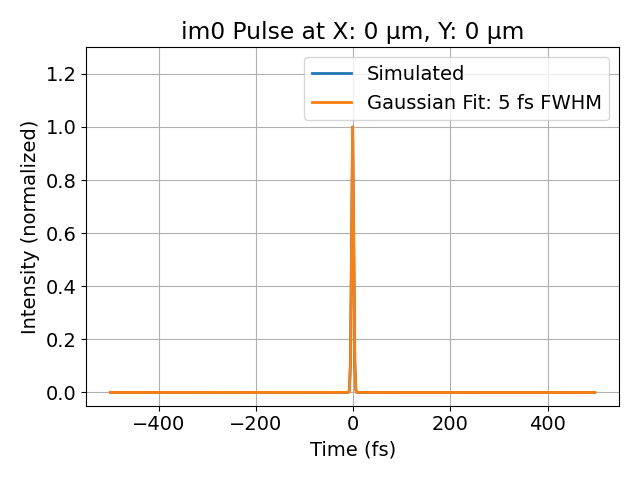

<IPython.core.display.Javascript object>


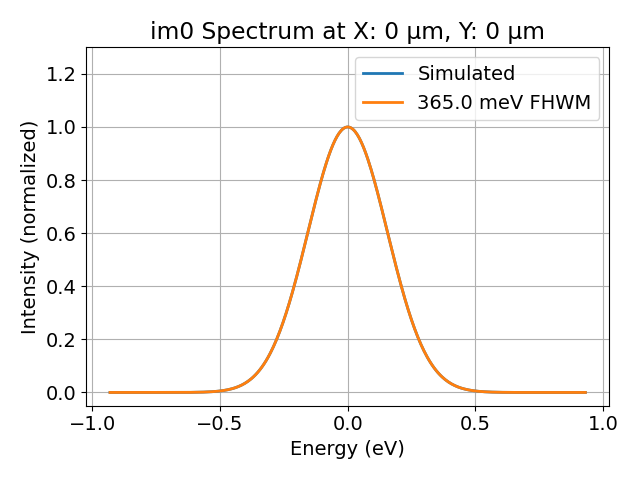

<IPython.core.display.Javascript object>


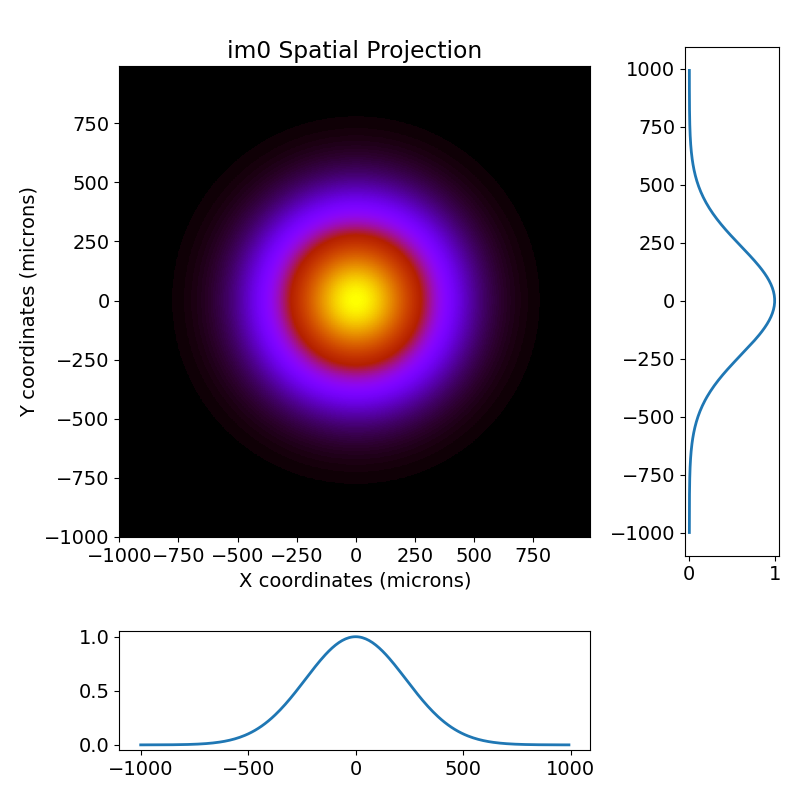

(<matplotlib.axes._subplots.AxesSubplot at 0x1200ba110>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1200ed610>)

In [18]:
# plot input pulse at beam center
pulse.plot_pulse('im0')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plot input beam spatial projection
pulse.imshow_projection('im0')

### Visualize focus properties

<IPython.core.display.Javascript object>


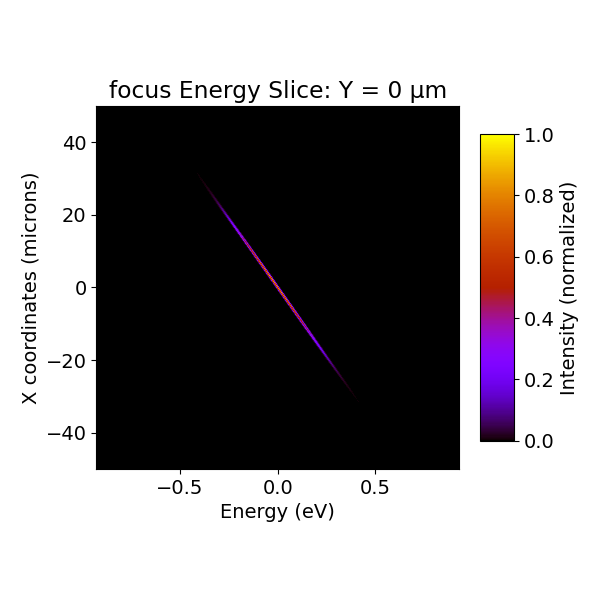

<IPython.core.display.Javascript object>


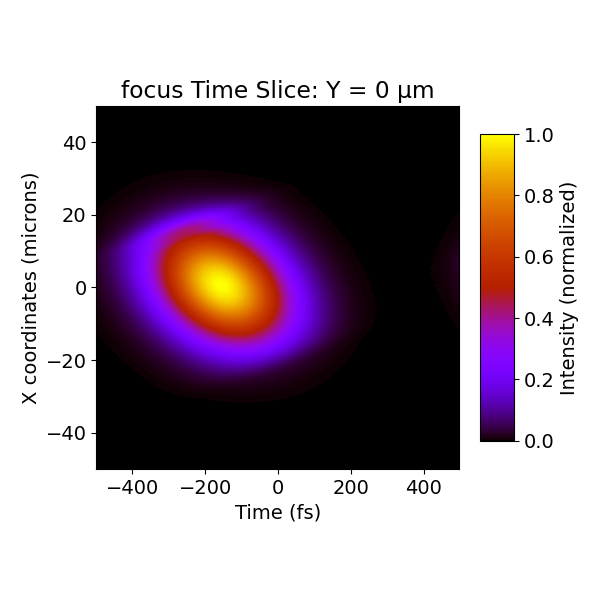

128


<IPython.core.display.Javascript object>


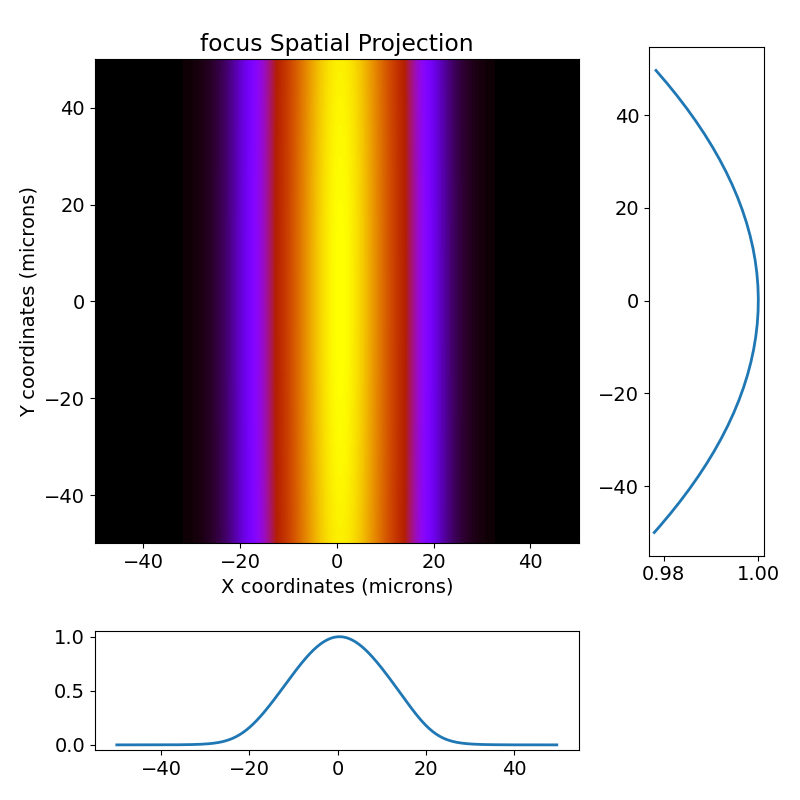

(<matplotlib.axes._subplots.AxesSubplot at 0x120dc8f50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1208ef490>)

In [27]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plot time slice of focus
pulse.imshow_time_slice('focus')
# show spatial projection
pulse.imshow_projection('focus')

### Visualize output

<IPython.core.display.Javascript object>


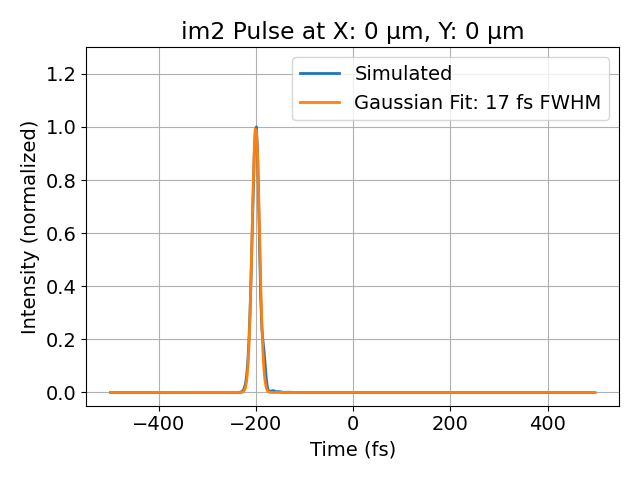

<IPython.core.display.Javascript object>


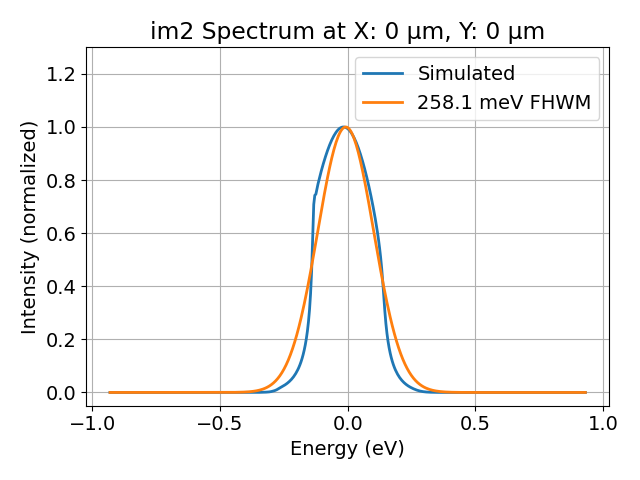

<IPython.core.display.Javascript object>


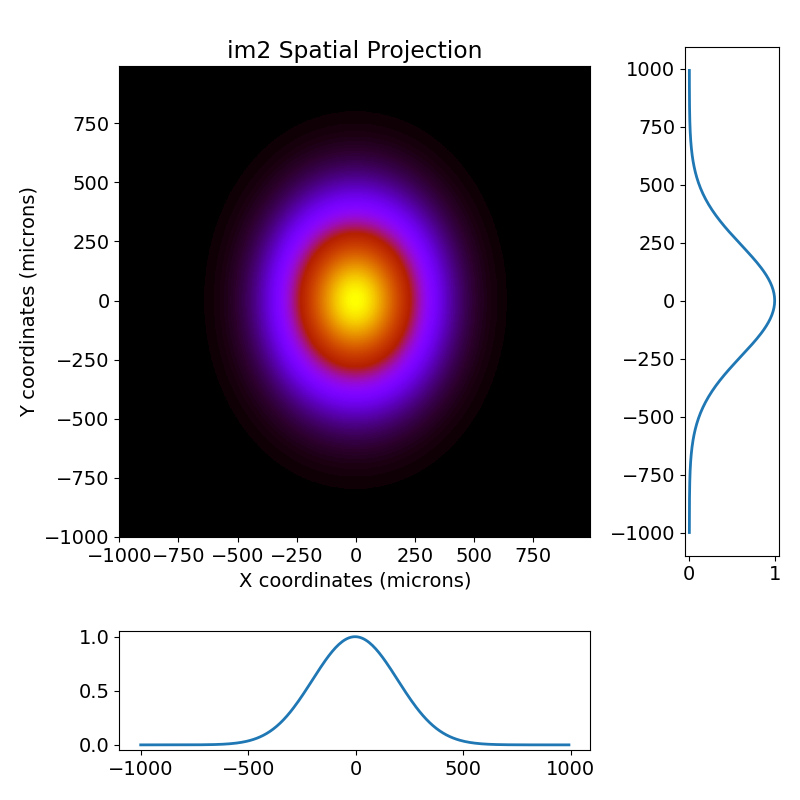

<IPython.core.display.Javascript object>


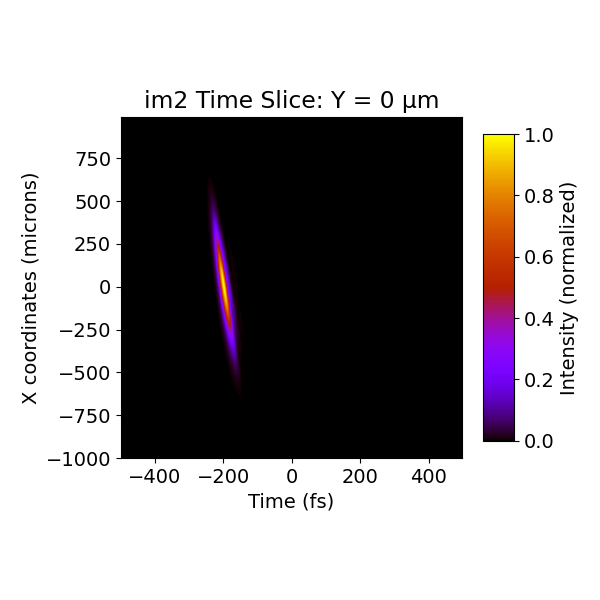

128


<IPython.core.display.Javascript object>


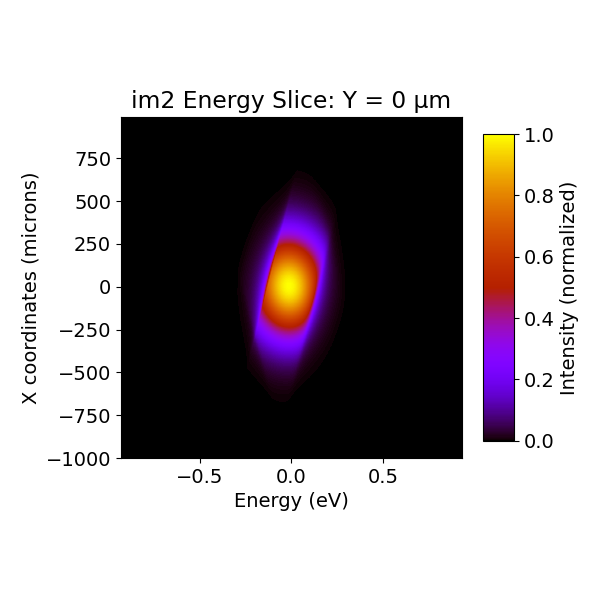

<IPython.core.display.Javascript object>


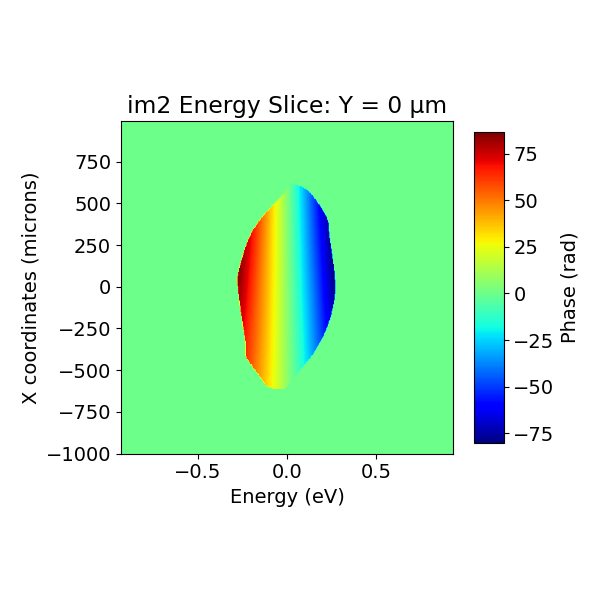

In [28]:
# plot output pulse at beam center
pulse.plot_pulse('im2')
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# show spatial projection of output
pulse.imshow_projection('im2')
# show time slice of output
pulse.imshow_time_slice('im2')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

In [2]:
lambda0 = 1239.8/9000*1e-9
phase = 80
path = phase*lambda0/2/np.pi

In [3]:
print(path)

1.7539582084029499e-09
